In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
def check_First_order_up_wind(num_x,dt,num_t):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    c =dt/dx
    tt =dt*num_t
    for t in range(num_t):
        for i in range(num_x,0,-1):
            ut[i] = ut[i] -c*(ut[i]-ut[i-1])
        ut[0] = ut[num_x]
    plt.plot(x, u0, label='Initial')
    plt.plot(x, ut, '--', label='Simulation')
    plt.legend()
    plt.title(f'C: {c}, T: {tt}')
    plt.show()

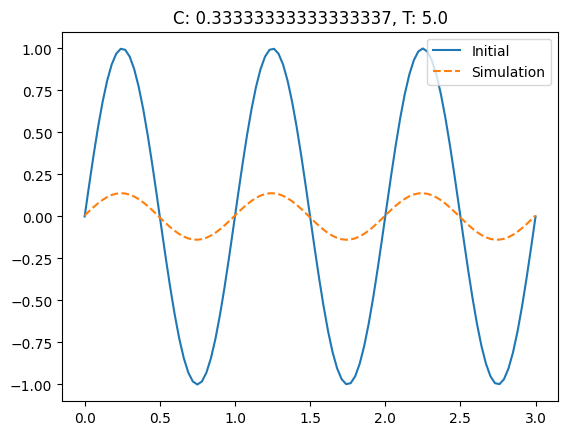

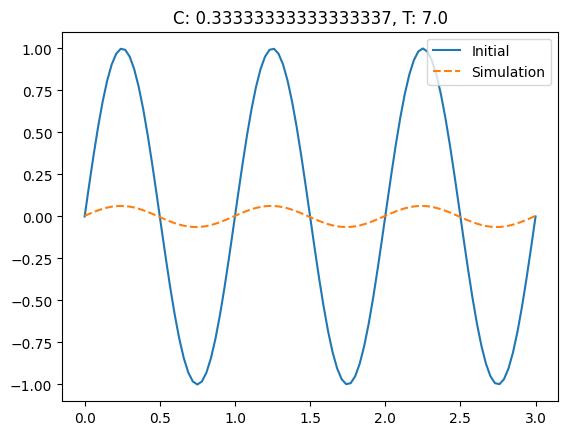

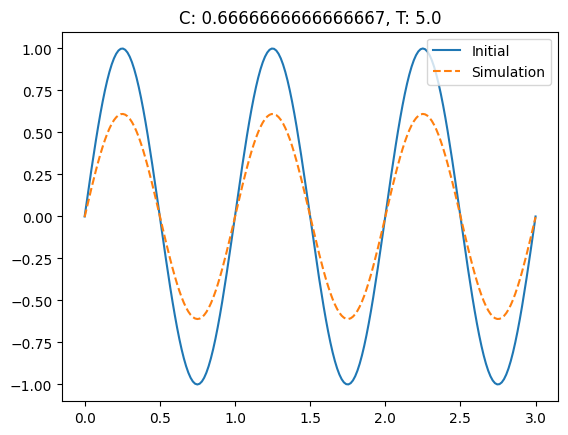

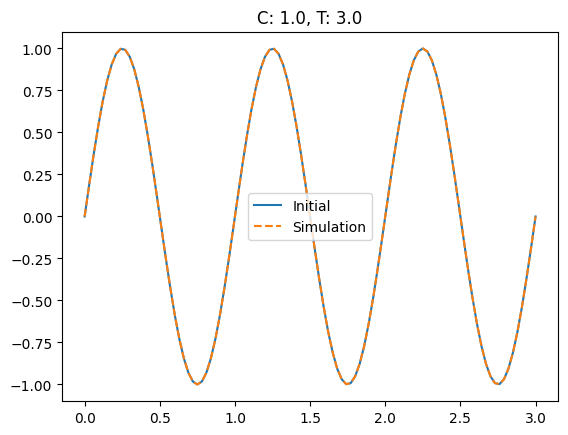

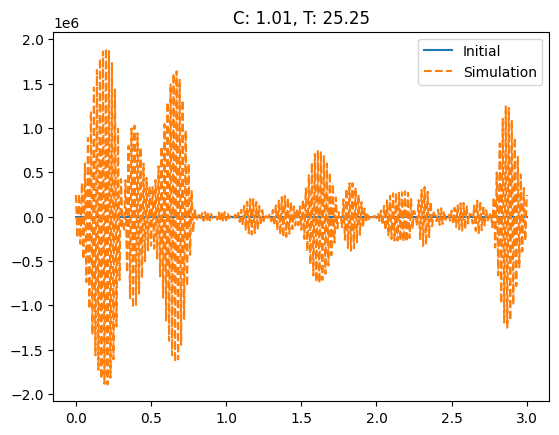

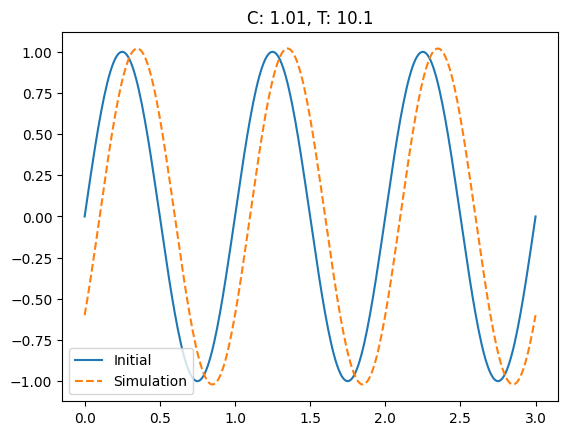

In [165]:
check_First_order_up_wind(100,0.01,500)
check_First_order_up_wind(100,0.01,700)
check_First_order_up_wind(200,0.01,500)
check_First_order_up_wind(100,0.03,100)
check_First_order_up_wind(300,0.0101,2500)
check_First_order_up_wind(300,0.0101,1000)

In [81]:
def exact_solution(x, t):
    return np.sin(2 * np.pi * (x - t))

In [ ]:
H = []
DF = []
num_x = 100
dt = 0.01
num_t =500
for i in range(6):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    for t in range(num_t):
        for i in range(num_x,0,-1):
            ut[i] = ut[i] -c*(ut[i]-ut[i-1])
        ut[0] = ut[num_x]
    DF.append(np.max(u0 - ut))
    num_x = num_x*2
    dt =dt/2
    num_t = num_t*2

print(DF)
res = []
for i in range(5):
    res.append(DF[i+1]/DF[i])

print(res)

[0.7588875384678159, 0.5086900797751874, 0.2990429986382408, 0.1627675089100149, 0.08499571079292212, 0.04344140409437658]
[0.6703102291048633, 0.5878687446989355, 0.5442946654869473, 0.522190892777695, 0.5111011330938137]


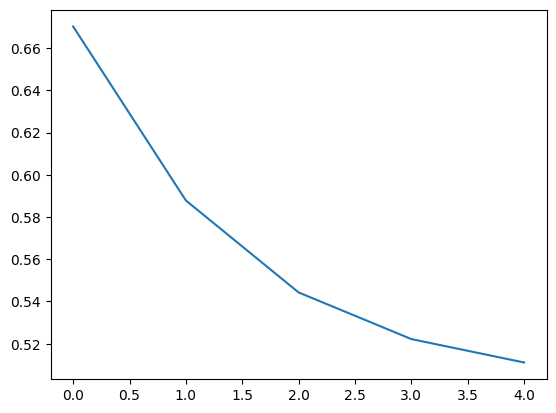

In [136]:
plt.plot(res)

In [177]:
def check_Lax_Wendrof(num_x,dt,num_t):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    c =dt/dx
    tt =dt*num_t
    for t in range(num_t):
        u_new = np.zeros_like(u0)
        u_new[num_x] = ut[num_x] -c/2*(ut[1]-ut[num_x-1])+c*c/2*(ut[1]-2*ut[num_x]+ut[num_x-1])
        for i in range(num_x-1,0,-1):
            u_new[i] = ut[i] -c/2*(ut[i+1]-ut[i-1])+c*c/2*(ut[i+1]-2*ut[i]+ut[i-1])
        u_new[0] = ut[0] -c/2*(ut[1]-ut[num_x-1])+c*c/2*(ut[1]-2*ut[0]+ut[num_x-1])
        ut = u_new
    plt.plot(x, u0, label='Initial')
    plt.plot(x, ut, '--', label='Simulation')
    plt.legend()
    plt.title(f'C: {c}, T: {tt}')
    plt.show()

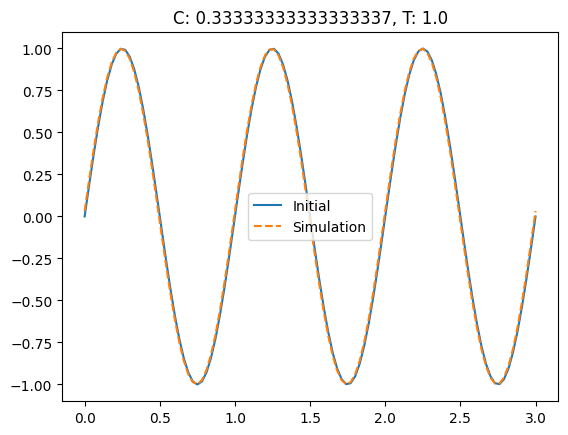

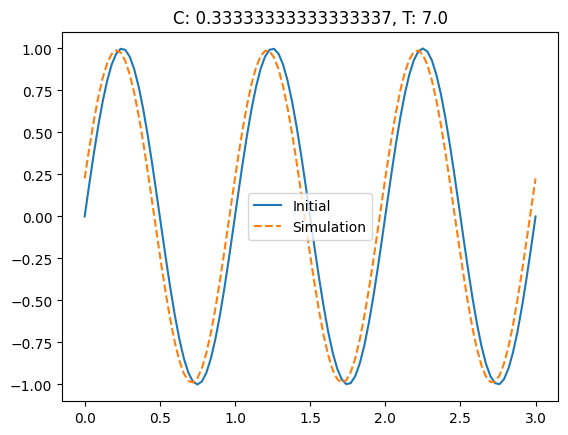

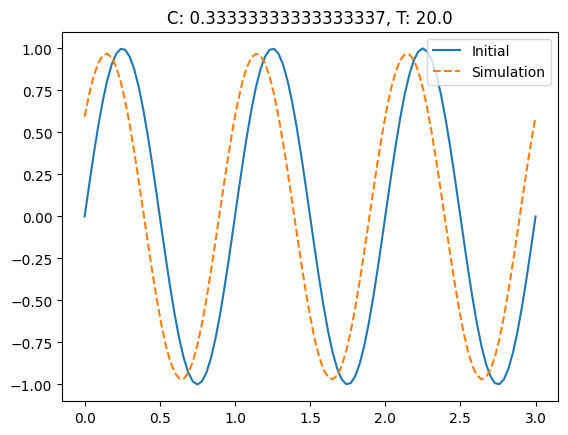

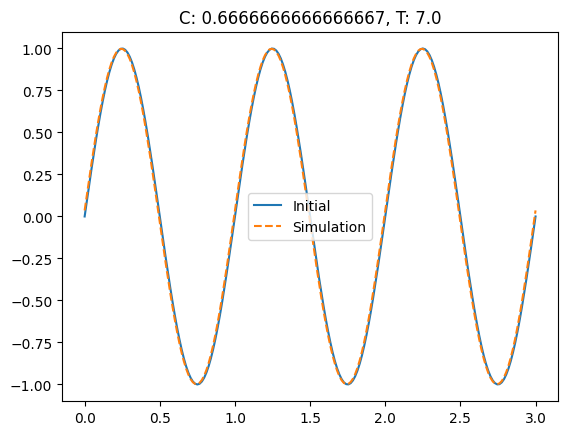

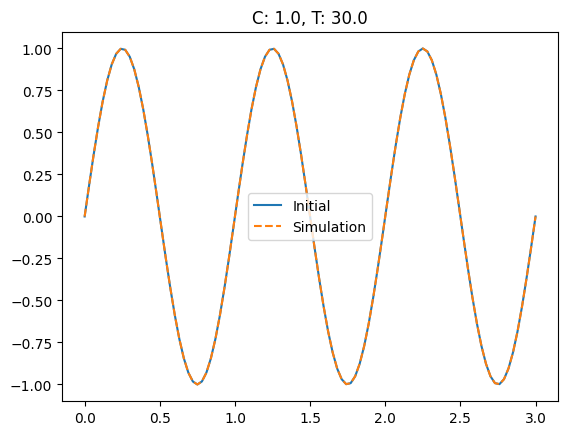

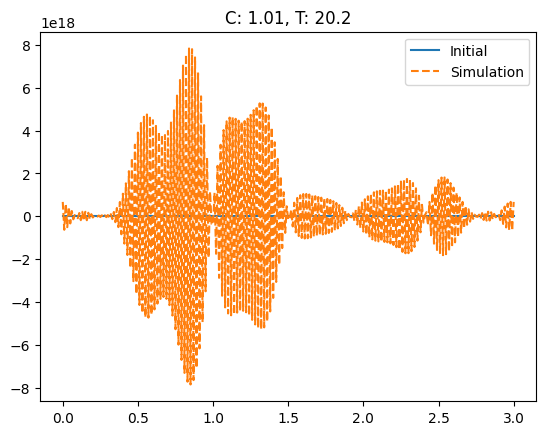

In [179]:

check_Lax_Wendrof(100,0.01,100)
check_Lax_Wendrof(100,0.01,700)
check_Lax_Wendrof(100,0.01,2000)
check_Lax_Wendrof(200,0.01,700)
check_Lax_Wendrof(100,0.03,1000)
check_Lax_Wendrof(300,0.0101,2000)


In [184]:
def mean_squared_error(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("两个列表的长度必须相同")
    
    return sum((a - b)for a, b in zip(list1, list2)) / len(list1)

H = []
DF = []
num_x = 100
dt = 0.01
num_t =500
for i in range(5):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    c =dt/dx
    tt =dt*num_t
    for t in range(num_t):
        u_new = np.zeros_like(u0)
        u_new[num_x] = ut[num_x] -c/2*(ut[1]-ut[num_x-1])+c*c/2*(ut[1]-2*ut[num_x]+ut[num_x-1])
        for i in range(num_x-1,0,-1):
            u_new[i] = ut[i] -c/2*(ut[i+1]-ut[i-1])+c*c/2*(ut[i+1]-2*ut[i]+ut[i-1])
        u_new[0] = ut[0] -c/2*(ut[1]-ut[num_x-1])+c*c/2*(ut[1]-2*ut[0]+ut[num_x-1])
        ut = u_new
    DF.append(np.abs(mean_squared_error(u0,ut)))
    num_x = num_x*2
    dt =dt/2
    num_t = num_t*2

print(DF)
res = []
for i in range(4):
    res.append(2*DF[i+1]/DF[i])

print(res)

[0.0016125523665161661, 0.00020526990959787708, 2.5765766027490468e-05, 3.225586352030935e-06, 4.0346992670511935e-07]
[0.2545900695818665, 0.2510427960724053, 0.2503776793276346, 0.2501684237664767]


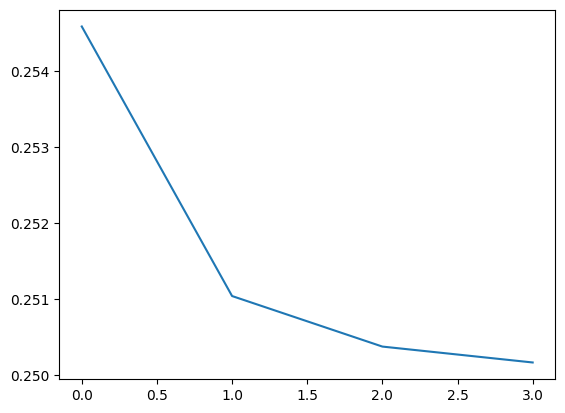

In [185]:
plt.plot(res)

In [9]:
def check_up_wind_warming_beam(num_x,dt,num_t):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    c =dt/dx
    tt =dt*num_t
    for t in range(num_t):
        u_new = np.zeros_like(u0)
        u_new[1] = ut[1] -c*(ut[1]-ut[0])-c*(1-c)/2*(ut[1]-2*ut[0]+ut[num_x-1])
        for i in range(num_x,1,-1):
            u_new[i] = ut[i] -c*(ut[i]-ut[i-1])-c*(1-c)/2*(ut[i]-2*ut[i-1]+ut[i-2])
        u_new[0] = ut[num_x]
        ut = u_new
    plt.plot(x, u0, label='Initial')
    plt.plot(x, ut, '--', label='Simulation')
    plt.legend()
    plt.title(f'C: {c}, T: {tt}')
    plt.show()

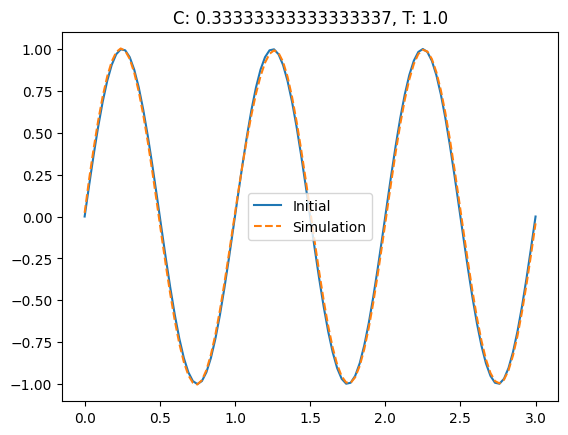

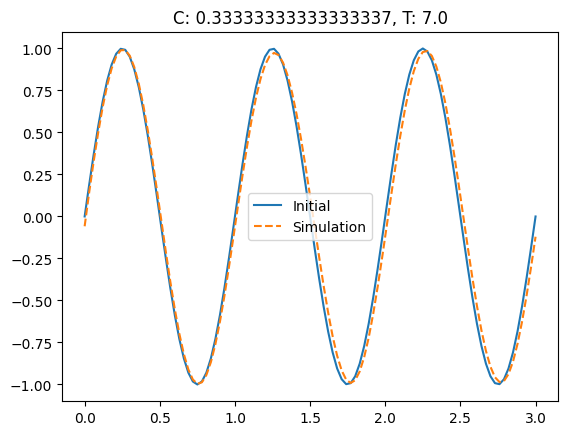

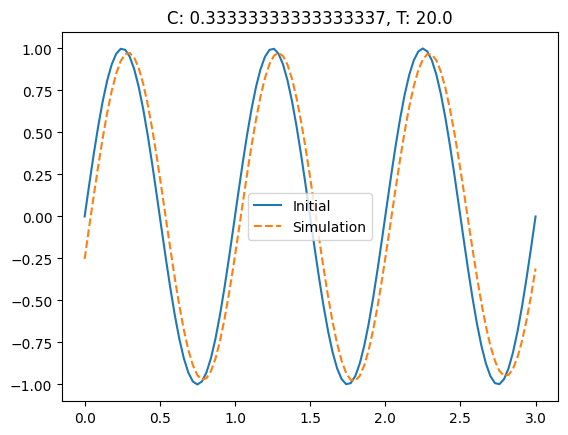

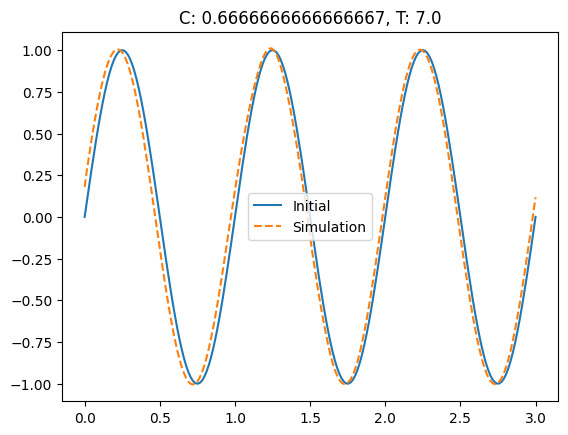

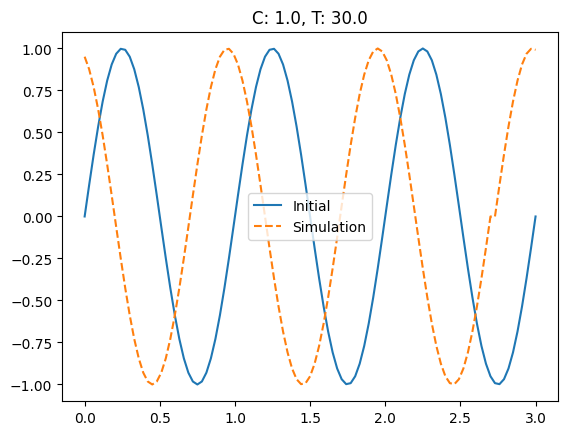

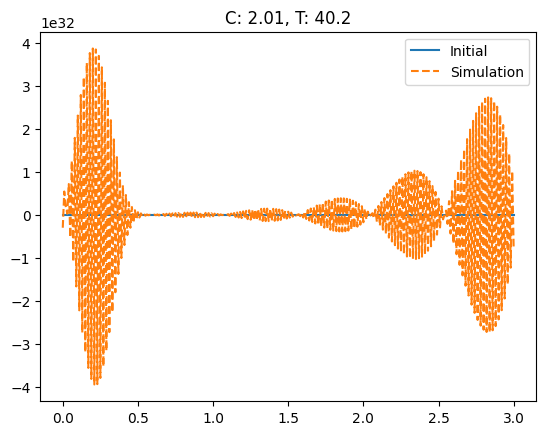

In [11]:
check_up_wind_warming_beam(100,0.01,100)
check_up_wind_warming_beam(100,0.01,700)
check_up_wind_warming_beam(100,0.01,2000)
check_up_wind_warming_beam(200,0.01,700)
check_up_wind_warming_beam(100,0.03,1000)
check_up_wind_warming_beam(300,0.0201,2000)

In [29]:
H = []
DF = []
num_x = 300
dt = 0.01
num_t =400
for i in range(6):
    x = np.linspace(0, 3, num_x+1)
    u0 = np.sin(2 * np.pi * x)
    ut = np.sin(2 * np.pi * x)
    dx = x[1] - x[0]
    c =dt/dx
    tt =dt*num_t
    for t in range(num_t):
        u_new = np.zeros_like(u0)
        u_new[1] = ut[1] -c*(ut[1]-ut[0])-c*(1-c)/2*(ut[1]-2*ut[0]+ut[num_x-1])
        for i in range(num_x,1,-1):
            u_new[i] = ut[i] -c*(ut[i]-ut[i-1])-c*(1-c)/2*(ut[i]-2*ut[i-1]+ut[i-2])
        u_new[0] = ut[num_x]
        ut = u_new
    DF.append(np.abs(ut[0]-u0[0]))
    num_x = num_x*2
    dt =dt/2
    num_t = num_t*2

print(DF)
res = []
for i in range(5):
    res.append(DF[i+1]/DF[i])

print(res)

[0.12533323356430304, 0.0627905195293143, 0.031410759078127626, 0.015707317311819208, 0.007853900888711244, 0.003926980723803934]
[0.5009885865355833, 0.5002468416185541, 0.5000616913698448, 0.5000154216532863, 0.5000038553387344]


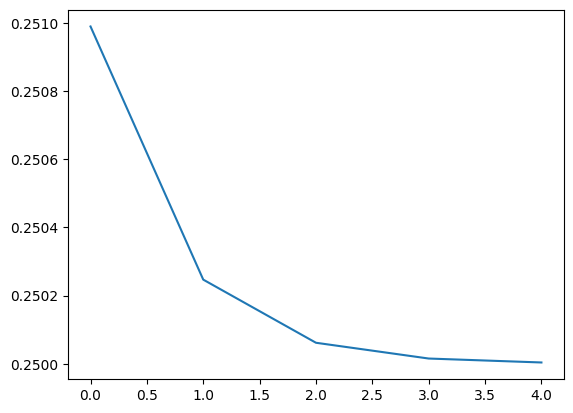

In [30]:
for i in range(5):
    res[i]=res[i]*res[i]

plt.plot(res)